***

This dataset contains Telco's CRM information on customers who left within the last month – the column is called Churn.
<br>
We have information about:
<br>
 - If a customer has left within the last month - the column is called Churn.
<br>
 - Services that each customer has signed up for
<br>
 - Customer account information
<br>
 - Demographic info about customers
 
***

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [41]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 1. Data Overview

In [42]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.shape

(7043, 21)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## 2. Data Manipulation and Cleaning

There aren't any null values in the dataset, but there is still a little cleaning to be done.

We notice that the 'TotalCharges' column is an object. Since the values are numbers, let's convert it to a float type and use the errors='coerce' argument to replace empty values to null values.


In [45]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The missing data in the column have been replaced with null values. Now let's remove the null values

In [46]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Some columns have values that we can replace. For example the following column has values 'Yes', 'No' and 'No phone service'. The last two are basically saying the same thing. 

In [47]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [48]:
#Replace 'No phone service' values to 'No' in the MultipleLines Column

df['MultipleLines'].replace('No phone service', 'No', inplace=True)
df['MultipleLines'].unique()

#Replace 'No internet service' values to 'No' for serveral columns

replace_cols = ['MultipleLines', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies' ]
for i in replace_cols:
    df[i].replace('No internet service', 'No', inplace=True)


Instead of having 'Yes and 'No' values for the Churn columns, let's replace those values with 1 and 0. This will help with logistic regression ... 

In [49]:
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df["Churn"] = df.Churn.astype(int)
df["Churn"].dtype

dtype('int64')

Let's remove customerID column from our analysis because it is not a feature that will help in the prediction model. 

In [50]:
df2 = df.drop(['customerID'], axis=1)
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [51]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include= [np.object]).columns
categorical_features

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [52]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include= [np.object]).columns

<br>

## 3. Exploratory Data Analysis

Let's visualize some columns, the ones that we can intuitively guess will have an impact on Churn. 
<br>
1. Contract Type
2. Monthly Charges
3. Tenure
4. Senior Citizen
<br>

But first, what percentage of customers churned last month? 

In [53]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5,1,'Churned customers')

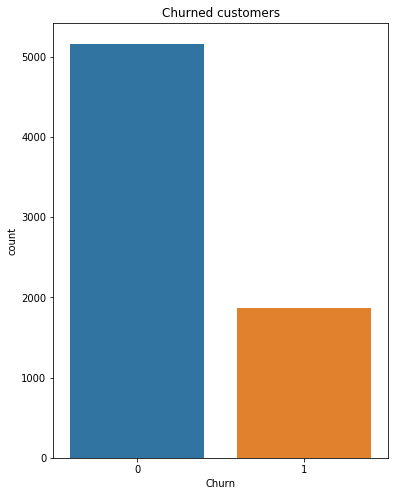

In [54]:
plt.figure(figsize=(6, 8))
sns.countplot(df['Churn'])
plt.title('Churned customers')

In [55]:
df['Churn'].value_counts().values.tolist() / df['customerID'].count()

array([0.73421502, 0.26578498])

<b>26.6%</b> of Telco customers churned last month.</br>
<b>73.4%</b> of Telco customers did not churn last month.

<br>

### 3.1 Churn based on contract type

In [56]:
contract_churn = df['Churn'].groupby(df['Contract']).value_counts().reset_index(name='Churn Count')
contract_churn

,Contract,Churn,Churn Count
0,Month-to-month,0,2220
1,Month-to-month,1,1655
2,One year,0,1306
3,One year,1,166
4,Two year,0,1637
5,Two year,1,48


Text(0.5,1,'Churned customers based on contract type')

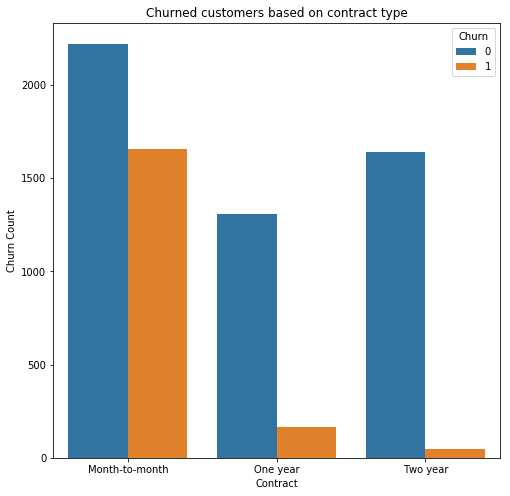

In [57]:
plt.figure(figsize=(8, 8))
sns.barplot(x=contract_churn['Contract'], y = contract_churn['Churn Count'], hue=contract_churn['Churn'], data=contract_churn)
plt.title('Churned customers based on contract type')

Seems like a very high percentage of customers with a month to month contract end up churning. 

<br>

### 3.2 Monthly charges distribution based on churn

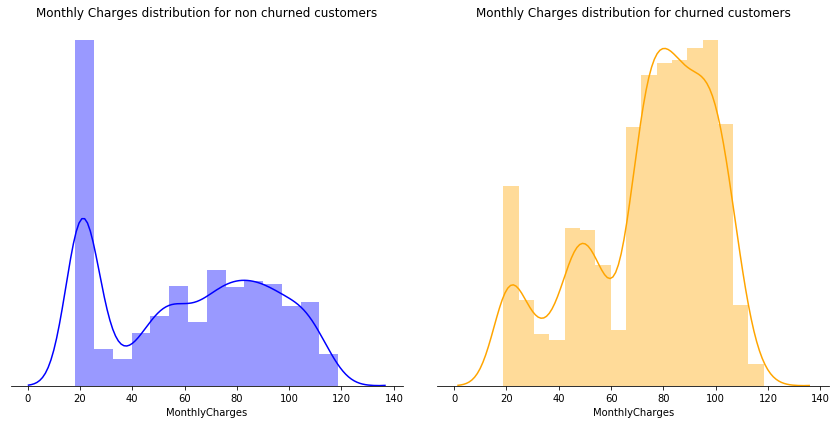

In [58]:
# Monthly charges distrubition

titles = ['Monthly Charges distribution for non churned customers', 'Monthly Charges distribution for churned customers']

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

[ax.get_xaxis().get_major_formatter().set_scientific(False) for ax in axes.ravel()]

sns.despine(left=True)

sns.distplot(df[(df.Churn == 0)]['MonthlyCharges'], kde=True, color="b", ax=axes[0])
sns.distplot(df[(df.Churn == 1)]['MonthlyCharges'], kde=True,  color="orange", ax=axes[1])

n = 0
for i in titles:
    axes[n].set_title(titles[n])
    n += 1

plt.setp(axes, yticks=[])

plt.tight_layout()

Churned customers are on average paying a lot more per month than non churned, a lot of whom are paying 20$ or under per month. 

<br>

### 3.3 Tenure distribution based on churn

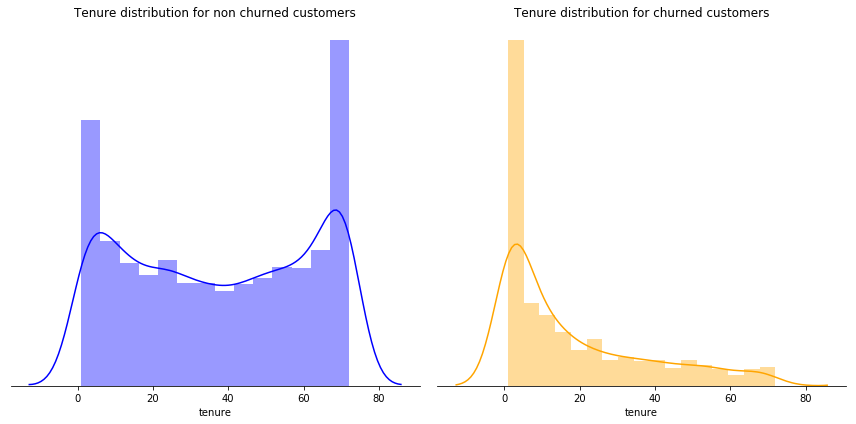

In [59]:
# Tenure distrubition

titles = ['Tenure distribution for non churned customers', 'Tenure distribution for churned customers']

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

[ax.get_xaxis().get_major_formatter().set_scientific(False) for ax in axes.ravel()]

sns.despine(left=True)

sns.distplot(df[(df.Churn == 0)]['tenure'], kde=True, color="b", ax=axes[0])
sns.distplot(df[(df.Churn == 1)]['tenure'], kde=True,  color="orange", ax=axes[1])

n = 0
for i in titles:
    axes[n].set_title(titles[n])
    n += 1

plt.setp(axes, yticks=[])

plt.tight_layout()

Tenure for churned customers is generally very low - below 4 months - which is what we can expect. On the contrary, tenure for non churned customers is much higher with highest percent of customers having an average tenure of over 70 months.  

</br>

### 3.4 Churn based on if the customer is a senior citizen or not

Let's find out: </br> What percentage of customers are senior citizens among all customers that <b>have churned</b> </br> What percentage of customers are senior citizens among all customers that <b>have not churned</b>

In [60]:
# Seperate into different tables churned and not churned customers 

churn     = df[df["Churn"] == 1]
not_churn = df[df["Churn"] == 0]

In [61]:
# Find the percentage of senior citizens among all customers that have churned

ChurnedSeniorValues = churn['SeniorCitizen'].value_counts().values.tolist() / churn['SeniorCitizen'].count()
ChurnedSeniorLabels = ['Other', 'Senior Citizens']
ChurnedSeniorValues

array([0.74531835, 0.25468165])

In [62]:
# Find the percentage of senior citizens among all customers that have NOT churned

NotChurnedSeniorValues = not_churn['SeniorCitizen'].value_counts().values.tolist() / not_churn['SeniorCitizen'].count()
NotChurnedSeniorValues

array([0.87100523, 0.12899477])

Among all the <b>churned</b> customers, 25.4% of them are senior citizens. </br>
Amont all the <b>non churned</b> customers, 12.9% of them are senior citizens. 

Text(0.5,1,'Senior citizen distribution - Not churned customers')

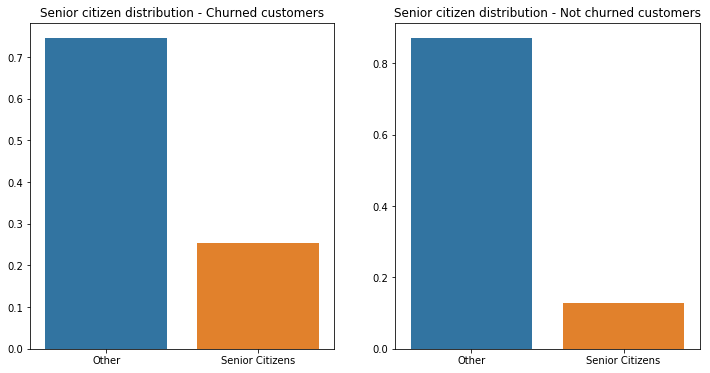

In [63]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
sns.barplot(x=ChurnedSeniorLabels, y = ChurnedSeniorValues, data=df, ax=axes[0])
sns.barplot(x=ChurnedSeniorLabels, y = NotChurnedSeniorValues, data=df, ax=axes[1])

axes[0].set_title('Senior citizen distribution - Churned customers')
axes[1].set_title('Senior citizen distribution - Not churned customers')


There is a high percentage of senior citizens among all the customers that have churned VS not churned

<br>

## 4. Preprocessing

### 4.1 Encoding the data

Because machine learning algorithms require that their input is numerical, all of our categorical features must be transformed into numerical features before we can use any of these algorithms.
An easy way to do this is to one-hot encode the categorical features with the get_dummies() method.

In [64]:
# onehotencoding the data

df_dummies = pd.get_dummies(df2)
df_dummies.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<br>

### 4.2 Normalizing the data
Great, all our categorical data has now been transformed in to numeric. 
we now need to normalize all the data so that the algorithms won't have a biais for data that is inherently larger or smaller. 
We're going to use the MinMaxScaler to "squish" all values between 0 and 1. 

In [65]:
# Let's set our target (y) to be the Churn column and our features (X) to be all the other columns

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Let's normalize the data into the [0,1] range

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
features = X.columns

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## 5. Model Building


### 5.1 Splitting the data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<br>

### 5.2 Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 5.2.1 Correlation with logistic regression

We can now determine the weights for each feature. Let's see which ones have the highest correlation with customer churn.

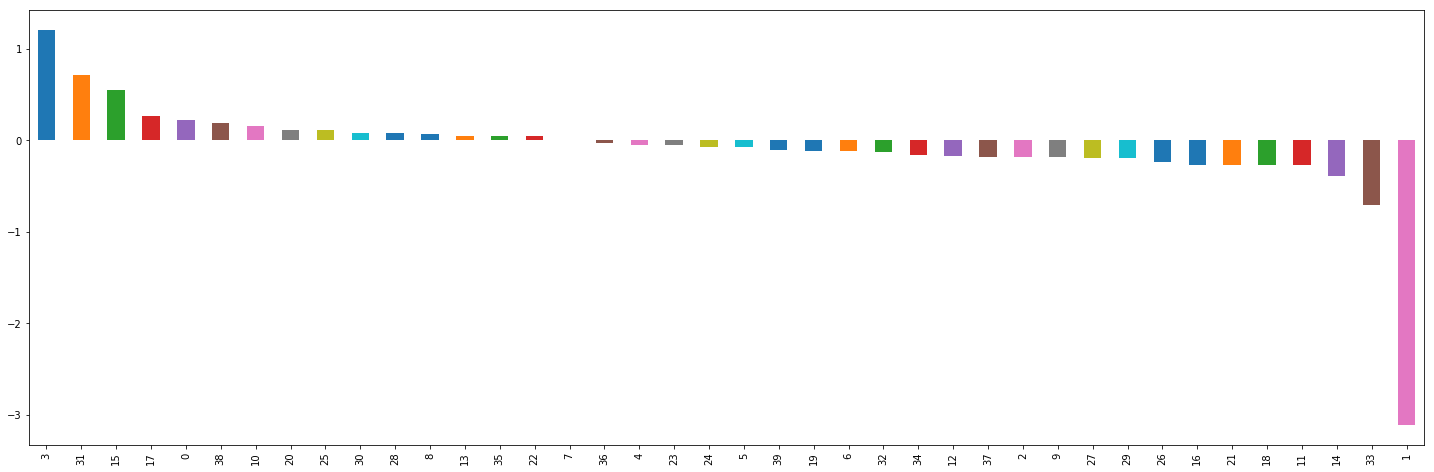

In [69]:
# Let's use the logistic regression attribute: coef_ to plot the correlation

plt.figure(figsize=(25, 8))
weights = pd.Series(model.coef_.ravel(), index=features)
weights.sort_values(ascending = False).plot(kind='bar')

Total charges, having a month to month contract and having fiber optic internet service seem to have the highest correlation with not churning.
On the contrary, tenure has a big negative correlation with churn, meaning the more years a customer has been with Telco, the less likely he is to churn.

#### 5.2.2 Score

In [70]:
model.score(X_test, y_test)

0.795734597156398

The model was able to predict customer Churn of <b>79.57%</b> of the samples

Let's see if we can get a better result using K Neighbors Classifier


<br>

### 5.3 Classifying using K Neighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Let's try using the parameter k=10

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7606635071090048

This is lower than the logistic regression. But maybe there is a better k parameter value that can increase our prediction score. 

In [72]:
k_values = np.arange(1, 50)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


In [73]:
results = pd.DataFrame({
    'K': k_values,
    'Scores': scores
})
results.head(5)


,K,Scores
0,1,0.727488
1,2,0.748341
2,3,0.751185
3,4,0.754028
4,5,0.756872


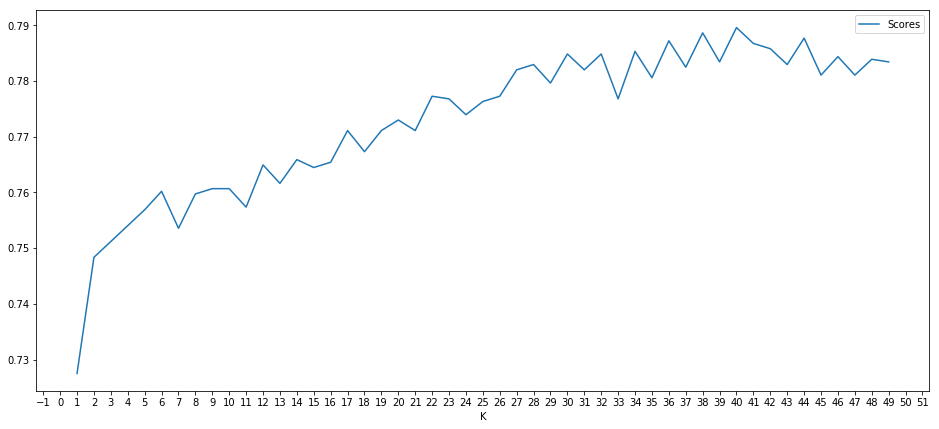

In [74]:
# Let's plot all of our scores for the different k values

import matplotlib.ticker as plticker
ax = results.plot(x='K', y='Scores', figsize=(16, 7), x_compat=True)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))

In [75]:
# Find the highest score

results['Scores'].max()

0.7895734597156399

Our max score with K neighbors classifier is 78.95% which is still lower than the logistic regression.

<br>

### 5.4 Support Vector Machine

In [76]:
#SVM

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7914691943127962

Our accuracy with SVM is 79.1%. 

In [78]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[1371  178]
 [ 262  299]]
